In [2]:
import pandas as pd
import numpy as np
print("Data Preparation 'a':")
print("     ")

# Read the selected data
df = pd.read_excel('/Users/AnanyaPal1/Documents/Certifications & Applications/Analysis-of-Oncological-Cancer-Screening-in-Latvia-/survey_data/survey_data.xlsx')
# list the fields/variables
display(df.head())
# identifing their types
display(df.dtypes)

print("     ")
print("Data Preparation 'b':")

print("     ")
print('Outliers:')
print("     ")

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'Age':")
print(outliers[['Age']])
# Remove outliers from 'Age' column
print("  After Fixing the Outliers:   ")
df = df[~((df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR))]
display(df.head())

Q1 = df['Number of children'].quantile(0.25)
Q3 = df['Number of children'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Number of children'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'Number of children':")
print(outliers[['Number of children']])
# Remove outliers from 'Number of children' column
print("  After Fixing the Outliers:   ")
df = df[~((df['Number of children'] < Q1 - 1.5 * IQR) | (df['Number of children'] > Q3 + 1.5 * IQR))]
display(df.head())

print("     ")
print('Missing data:')
print("     ")

# List of columns for which you want to impute missing data
columns_to_impute = ['Age',
                     ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer',
                     'Gender','City/town/village',
                     'Marital Status','Number of children',
                     'Highest level of school completed',
                     'Occupation', 
                     'Employment status', 'Smoking status', 
                     'Daily alcohol consumption ',
                     'Exercise frequency',
                     'Knowledge of General Practitioner',
                     'Last visit to General Practitioner',
                     'Health check-up frequency',
                     'For women only: last visit to gynaecologist']

# List Missing data before the Imputing
columns_with_missing_data = df[columns_to_impute].columns[df[columns_to_impute].isnull().any()]
print("Columns with missing data:")
print(columns_with_missing_data)

for column in columns_to_impute:
    if column in df.columns:  # Check if column exists in DataFrame
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            # Impute missing values with mean for numerical columns
            df[column] = df[column].fillna(df[column].mean())
            if column == 'Number of children':
                df[column] = df[column].round()  # Round to the nearest integer
        elif df[column].dtype == 'object':
            # Impute missing values with mode for categorical columns
            most_frequent_value = df[column].mode()[0]
            df[column] = df[column].fillna(most_frequent_value)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Check if there are still any missing values
print("Columns with missing data after imputation:")
print(df[columns_to_impute].columns[df[columns_to_impute].isnull().any()])

# Convert age column to integer after imputation
df['Age'] = df['Age'].astype(int)

print("  After Fixing the Missing Data:   ")
display(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


Data Preparation 'a':
     


,Country Code,Region,Age,"Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer",Gender,City/town/village,Marital Status,Number of children,Highest level of school completed,Occupation,...,Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment,Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life,Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures,Did NOT attend state-provided cancer screenings because I am not aware of the recommended guidelines or frequency for attending cancer screening,Did NOT attend state-provided cancer screenings because I have not received sufficient information or education about cancer screening from healthcare providers or public health sources,Motivation preference for attending medical screenings is personalised reminders and notifications,Motivation preference for attending medical screenings is rewards for participation,"Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places","Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar)","Motivation preference for attending medical screenings is ""Motivation interviewing"" by GP or other healthcare providers"
0,DE,NW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LV,RIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LV,RIX,48.0,No,Male,Rīga,Married or living with a partner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LV,JEL,23.0,No,Male,Riga,Marital Status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Country Code                                                                                                                                object
Region                                                                                                                                      object
Age                                                                                                                                        float64
 Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer                                                object
Gender                                                                                                                                      object
                                                                                                                                            ...   
Motivation preference for attending medical screenings is personalised reminders and notifications                    

     
Data Preparation 'b':
     
Outliers:
     
Outliers in 'Age':
Empty DataFrame
Columns: [Age]
Index: []
  After Fixing the Outliers:   


,Country Code,Region,Age,"Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer",Gender,City/town/village,Marital Status,Number of children,Highest level of school completed,Occupation,...,Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment,Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life,Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures,Did NOT attend state-provided cancer screenings because I am not aware of the recommended guidelines or frequency for attending cancer screening,Did NOT attend state-provided cancer screenings because I have not received sufficient information or education about cancer screening from healthcare providers or public health sources,Motivation preference for attending medical screenings is personalised reminders and notifications,Motivation preference for attending medical screenings is rewards for participation,"Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places","Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar)","Motivation preference for attending medical screenings is ""Motivation interviewing"" by GP or other healthcare providers"
0,DE,NW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LV,RIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LV,RIX,48.0,No,Male,Rīga,Married or living with a partner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LV,JEL,23.0,No,Male,Riga,Marital Status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Outliers in 'Number of children':
     Number of children
2                   NaN
3                   NaN
5                   NaN
6                   0.0
7                   0.0
..                  ...
114                 0.0
115                 2.0
117                 0.0
118                 0.0
119                 0.0

[108 rows x 1 columns]
  After Fixing the Outliers:   


,Country Code,Region,Age,"Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer",Gender,City/town/village,Marital Status,Number of children,Highest level of school completed,Occupation,...,Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment,Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life,Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures,Did NOT attend state-provided cancer screenings because I am not aware of the recommended guidelines or frequency for attending cancer screening,Did NOT attend state-provided cancer screenings because I have not received sufficient information or education about cancer screening from healthcare providers or public health sources,Motivation preference for attending medical screenings is personalised reminders and notifications,Motivation preference for attending medical screenings is rewards for participation,"Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places","Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar)","Motivation preference for attending medical screenings is ""Motivation interviewing"" by GP or other healthcare providers"
0,DE,NW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LV,RIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LV,RIX,48.0,No,Male,Rīga,Married or living with a partner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LV,JEL,23.0,No,Male,Riga,Marital Status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


     
Missing data:
     
Columns with missing data:
Index(['Age',
       ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer',
       'Gender', 'City/town/village', 'Marital Status', 'Number of children',
       'Highest level of school completed', 'Occupation', 'Employment status',
       'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency',
       'Knowledge of General Practitioner',
       'Last visit to General Practitioner', 'Health check-up frequency',
       'For women only: last visit to gynaecologist'],
      dtype='object')
Columns with missing data after imputation:
Index([], dtype='object')
  After Fixing the Missing Data:   


,Country Code,Region,Age,"Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer",Gender,City/town/village,Marital Status,Number of children,Highest level of school completed,Occupation,...,Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment,Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life,Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures,Did NOT attend state-provided cancer screenings because I am not aware of the recommended guidelines or frequency for attending cancer screening,Did NOT attend state-provided cancer screenings because I have not received sufficient information or education about cancer screening from healthcare providers or public health sources,Motivation preference for attending medical screenings is personalised reminders and notifications,Motivation preference for attending medical screenings is rewards for participation,"Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places","Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar)","Motivation preference for attending medical screenings is ""Motivation interviewing"" by GP or other healthcare providers"
0,DE,NW,46,No,Male,Riga,Married or living with a partner,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LV,RIX,46,No,Male,Riga,Married or living with a partner,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LV,RIX,48,No,Male,Rīga,Married or living with a partner,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LV,JEL,23,No,Male,Riga,Marital Status,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,30,46,No,Male,Riga,Married or living with a partner,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Answering study questions

In [14]:
all_columns = df.columns.tolist()
print(all_columns)

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

'Awareness participation rate:'

0.37606837606837606

'Awareness non-participation rate:'

0.2905982905982906

'Inference: Awareness participate rate- This indicates that approximately 37.6% of respondents who are aware of cancer screening in Latvia have participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 37.6% have undergone cancer screenings.'

'Awareness non-participation rate- This suggests that approximately 29.1% of respondents who are aware of cancer screening in Latvia have not participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 29.1% have not undergone cancer screenings.'

<Figure size 1400x1000 with 0 Axes>

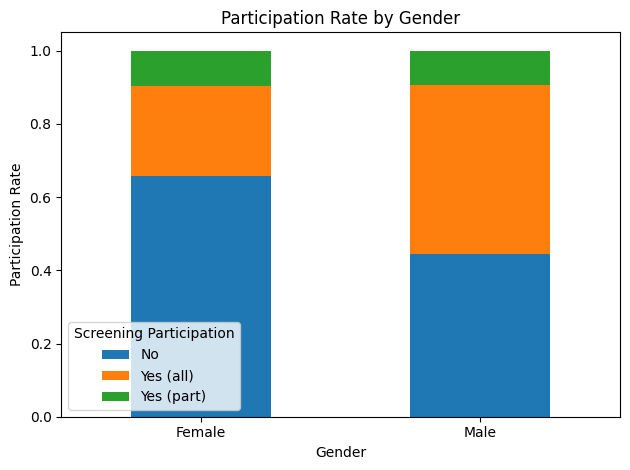

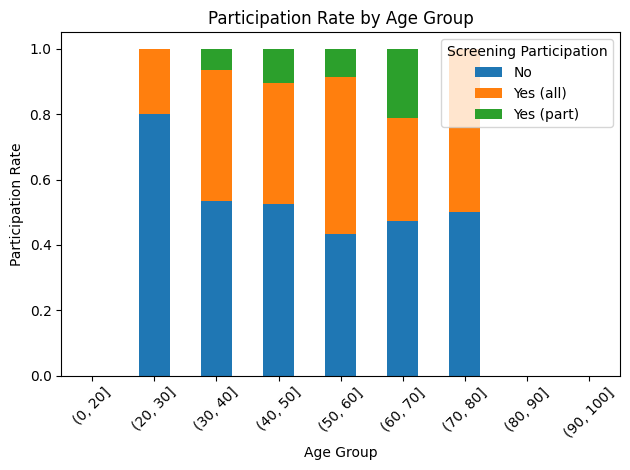

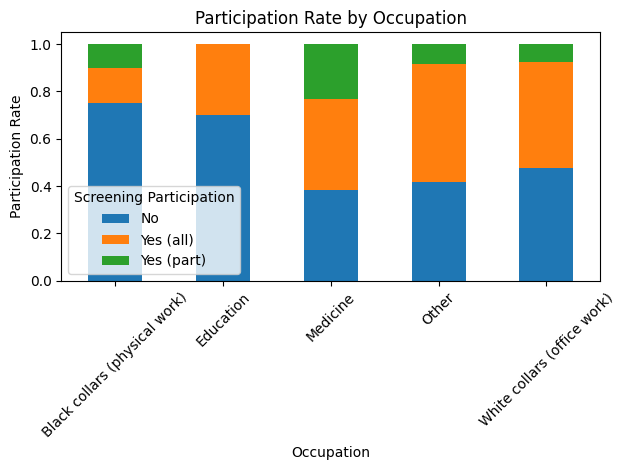

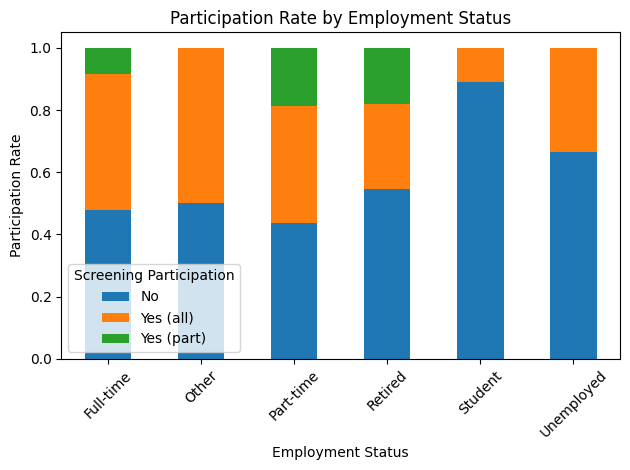

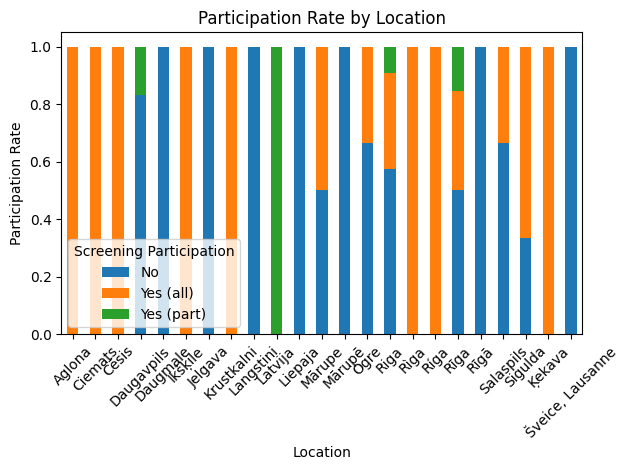

In [34]:
# Question-1 
# Does awareness about state-funded cancer screenings affect participation in populational screening in Latvia?

## Questions from the survey which can be used to answer the question
# Q17: Are you familiar with the concept of cancer screening in Latvia? (Yes/No)
# Q18: What types of cancer screening are you aware of? (Multiple-choice)
# Q19: Which of the following cancer screenings have you attended in the last year? (Multiple-choice)
# Q20: What sources have you used to learn about cancer screening tests? (Multiple-choice)
## Participation in Cancer Screening:
# Q25: If you received invitations for screenings, did you perform the screening? (Yes/No)
# Demographic and Socioeconomic Factors:
# Q1: What is your age? (Continuous)
# Q3: What is your gender? (Male/Female/Other)
# Q4: Where do you live? (City/Town/Village)
# Q8: What is your occupation? (Multiple-choice)
# Q9: What is your employment status? (Multiple-choice)
# Q13: Do you know who your general practitioner is? (Yes/No)


# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Select relevant columns
relevant_columns = [
    'Age', 
    'Gender', 
    'City/town/village', 
    'Occupation', 
    'Employment status',
    'Familiarity with the concept of cancer screening in Latvia',
    'Awareness about screening for cervical cancer (PAP smear)', 
    'Awareness about screening for colorectal cancer (blood in faeces)', 
    ' Awareness about screening for breast cancer (Mammography)', 
    'Awareness about screening for prostate cancer (PSA analysis) ', 
    'Awareness about screening for Colonoscopy', 
    'Awareness about Prostate examination ', 
    'No Awareness about any type of cancer screening',
    'Attended screening for cervical cancer (PAP smear) in the last year', 
    'Attended screening for CRC in the last year ', 
    'Attended screening for breast cancer in the last year', 
    'Attended screening for prostate cancer in the last year', 
    'Attended screening for colonoscopy in the last year ', 
    'Attended screening for prostate in the last year',
    'Not attended any cancer screening in the past year',
    'Learnt about canceer screening tests from the Internet- Self-seeking information ', 
    'Learnt about canceer screening tests from social media ', 
    'Learnt about canceer screening tests by my GP ', 
    'Learnt about canceer screening tests from advertisements ', 
    'Learnt about canceer screening tests from other resources ',
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?', 
    'Did your GP offer you a faecal-occult blood test during the last year? ', 
    'Did your GP offer you a prostate examination during last year? ', 
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
]

data = df[relevant_columns]

# Analyze the relationship between awareness and participation
# Count the number of respondents who are aware, have participated in screenings, and their sociodemographic characteristics
aware_participated = data[(data['Familiarity with the concept of cancer screening in Latvia'] == 'Yes') & 
                          (data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].isin(['Yes - for all the screenings that I received the invitations', 'Yes for a part of screenings that I received the invitations']))]
aware_not_participated = data[(data['Familiarity with the concept of cancer screening in Latvia'] == 'Yes') & 
                              (data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] == 'No')]

# Calculate proportions for different sociodemographic groups
total_responses = data.shape[0]
aware_participation_rate = len(aware_participated) / total_responses
aware_non_participation_rate = len(aware_not_participated) / total_responses

# Display results
display("Awareness participation rate:", aware_participation_rate)
display("Awareness non-participation rate:", aware_non_participation_rate)

display("Inference: Awareness participate rate- This indicates that approximately 37.6% of respondents who are aware of cancer screening in Latvia have participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 37.6% have undergone cancer screenings.")
display("Awareness non-participation rate- This suggests that approximately 29.1% of respondents who are aware of cancer screening in Latvia have not participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 29.1% have not undergone cancer screenings.")

" Visualization:  "

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Define mapping for the response options
response_mapping = {
    "Yes - for all the screenings that I received the invitations": "Yes (all)",
    "Yes for a part of screenings that I received the invitations": "Yes (part)",
    "No": "No"
}

# Make a copy of the DataFrame
data_copy = data.copy()

# Map the responses in the copied DataFrame
data_copy['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data_copy['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(response_mapping)

# Plot participation rate by gender
gender_participation = data_copy.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
gender_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Participation Rate')
plt.xticks(rotation=0)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by age group
age_participation = data_copy.groupby(pd.cut(data_copy['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]), observed=False)['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
age_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by occupation
occupation_participation = data_copy.groupby('Occupation')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
occupation_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by employment status
employment_participation = data_copy.groupby('Employment status')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
employment_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by city/town/village
location_participation = data_copy.groupby('City/town/village')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
location_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Location')
plt.xlabel('Location')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()
